## Zillow Dataset
- Annual Average Housing Prices by City and Region

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
house_df = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [3]:
house_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,102001,0,United States,Country,NaN,107824.0,107851.0,107901.0,108028.0,108172.0,...,260160.0,262686.0,265487.0,268473.0,271572.0,274922.0,278575.0,282729.0,287678.0,293349.0
1,394913,1,"New York, NY",Msa,NY,186425.0,185990.0,185713.0,185184.0,184869.0,...,493243.0,497873.0,502895.0,507811.0,512569.0,517462.0,522617.0,528316.0,535161.0,543322.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,184735.0,184993.0,185012.0,185121.0,185094.0,...,711532.0,718286.0,725600.0,733705.0,741990.0,751018.0,760575.0,773151.0,791679.0,813679.0
3,394463,3,"Chicago, IL",Msa,IL,147146.0,147127.0,147006.0,147067.0,146972.0,...,249971.0,252279.0,254624.0,256973.0,259066.0,261710.0,264389.0,267830.0,271447.0,275702.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,112761.0,112825.0,112986.0,113308.0,113656.0,...,266464.0,269047.0,271835.0,275156.0,278072.0,281908.0,286237.0,292023.0,298646.0,306031.0


In [4]:
house_df.shape

(911, 311)

In [5]:
house_df.nunique()

RegionID      911
SizeRank      907
RegionName    911
RegionType      2
StateName      51
             ... 
2021-02-28    907
2021-03-31    910
2021-04-30    909
2021-05-31    908
2021-06-30    910
Length: 311, dtype: int64

In [6]:
house_df.RegionType.unique()

array(['Country', 'Msa'], dtype=object)

In [7]:
az_housing_df = house_df[house_df.StateName == 'AZ']
az_housing_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
14,394976,14,"Phoenix, AZ",Msa,AZ,113358.0,113674.0,114035.0,114729.0,115407.0,...,309378.0,314378.0,319944.0,325900.0,332956.0,340211.0,348632.0,356369.0,367329.0,379485.0
53,395167,53,"Tucson, AZ",Msa,AZ,112496.0,112839.0,113237.0,113814.0,114250.0,...,237474.0,240487.0,244336.0,248561.0,253702.0,258457.0,263326.0,267762.0,274361.0,282493.0
202,395002,202,"Prescott, AZ",Msa,AZ,126235.0,126372.0,126768.0,127237.0,127831.0,...,338104.0,344097.0,351254.0,359014.0,366254.0,374474.0,382968.0,393789.0,405132.0,419581.0
213,394765,213,"Lake Havasu City, AZ",Msa,AZ,97264.0,97240.0,97232.0,97252.0,97391.0,...,255089.0,259226.0,263916.0,268636.0,273167.0,278048.0,284363.0,292054.0,301332.0,311178.0
218,395247,218,"Yuma, AZ",Msa,AZ,NaN,NaN,NaN,NaN,NaN,...,177319.0,180291.0,183315.0,186173.0,189023.0,192840.0,197415.0,201546.0,205657.0,209514.0


In [8]:
phx = house_df[house_df.RegionID == 394976].copy()

In [9]:
phx.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
14,394976,14,"Phoenix, AZ",Msa,AZ,113358.0,113674.0,114035.0,114729.0,115407.0,...,309378.0,314378.0,319944.0,325900.0,332956.0,340211.0,348632.0,356369.0,367329.0,379485.0


In [10]:
cols_to_drop = ['RegionID', 'SizeRank', 'RegionType', 'StateName']
phx_df = phx.drop(columns=cols_to_drop)

In [11]:
phx_df.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
14,"Phoenix, AZ",113358.0,113674.0,114035.0,114729.0,115407.0,116018.0,116584.0,117102.0,117614.0,...,309378.0,314378.0,319944.0,325900.0,332956.0,340211.0,348632.0,356369.0,367329.0,379485.0


In [12]:
phx_t = phx_df.T

In [13]:
phx_t = phx_t.rename(columns={14: "Phoenix"})

In [14]:
list(phx_t.columns)

['Phoenix']

In [15]:
phx_t.head()

,Phoenix
RegionName,"Phoenix, AZ"
1996-01-31,113358.0
1996-02-29,113674.0
1996-03-31,114035.0
1996-04-30,114729.0


In [16]:
phx_t.shape

(307, 1)

In [17]:
phx_t.nunique()

Phoenix    307
dtype: int64

In [18]:
phx_t = phx_t.drop('RegionName', axis=0)

In [19]:
phx_t.head()

,Phoenix
1996-01-31,113358.0
1996-02-29,113674.0
1996-03-31,114035.0
1996-04-30,114729.0
1996-05-31,115407.0


In [20]:
#phx_t = phx_t.Phoenix.astype('int64').dtypes


In [24]:
phx_t.dtypes

index      object
Phoenix    object
dtype: object

In [22]:
phx_t = phx_t.reset_index()

In [25]:
phx_t.head()

,index,Phoenix
0,1996-01-31,113358.0
1,1996-02-29,113674.0
2,1996-03-31,114035.0
3,1996-04-30,114729.0
4,1996-05-31,115407.0


In [26]:
phx_t = phx_t.rename(columns={'index':'Date'})

In [27]:
phx_t.head()

,Date,Phoenix
0,1996-01-31,113358.0
1,1996-02-29,113674.0
2,1996-03-31,114035.0
3,1996-04-30,114729.0
4,1996-05-31,115407.0


In [34]:
phx_t.Phoenix.describe()

count        306.0
unique       306.0
top       212049.0
freq           1.0
Name: Phoenix, dtype: float64

<AxesSubplot:xlabel='Phoenix', ylabel='Count'>

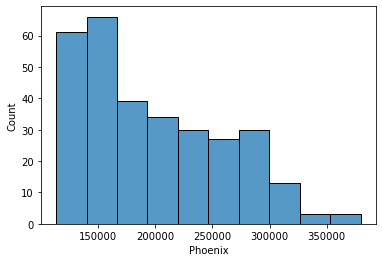

In [43]:
sns.histplot(data=phx_t, x='Phoenix')
